In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [3]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
y = data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [5]:
X = data.drop('quality', axis=1)
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [6]:
X.shape

(1599, 11)

## Data Preprocessing
+ Splitting into the Training and Validation Sets

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.23, random_state = 0)

In [8]:
df_train = data.sample(frac=0.8, random_state=0)
df_valid = data.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [9]:
df_train.max(axis=0)

fixed acidity            15.9000
volatile acidity          1.5800
citric acid               0.7900
residual sugar           13.9000
chlorides                 0.6110
free sulfur dioxide      72.0000
total sulfur dioxide    289.0000
density                   1.0032
pH                        4.0100
sulphates                 1.9800
alcohol                  14.9000
quality                   8.0000
dtype: float64

In [10]:
max_ = X_train.max(axis=0)
max_

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
dtype: float64

## Create a Fully Connected Neural Network

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[11]),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

How does the Network learn?

## Using the Optimizer and Loss Functions
These two functions take charge of the Model Training Process

In [12]:
model.compile(optimizer='adam', loss='mae')

### Early Stopping
 To prevent underfitting and overfitting

In [13]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [14]:
model_data = model.fit(X_train, y_train,
          validation_data = (X_valid, y_valid),
          batch_size = 128,
          epochs = 300,
          callbacks = [early_stopping]
         )

Epoch 1/300
10/10 [==============================] - 1s 60ms/step - loss: 2.8904 - val_loss: 2.3819
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 2.3383 - val_loss: 1.8717
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 1.8057 - val_loss: 1.4080
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 1.2769 - val_loss: 0.8992
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 0.8967 - val_loss: 0.7913
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 0.7909 - val_loss: 0.7441
Epoch 7/300
10/10 [==============================] - 0s 6ms/step - loss: 0.7637 - val_loss: 0.7169
Epoch 8/300
10/10 [==============================] - 0s 8ms/step - loss: 0.7105 - val_loss: 0.6820
Epoch 9/300
10/10 [==============================] - 0s 7ms/step - loss: 0.6820 - val_loss: 0.6820
Epoch 10/300
10/10 [==============================] - 0s 7ms/step - loss: 0.6841 - val_loss: 0.6855
Epoch 11

10/10 [==============================] - 0s 7ms/step - loss: 0.5385 - val_loss: 0.5098
Epoch 84/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5381 - val_loss: 0.5279
Epoch 85/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5480 - val_loss: 0.5266
Epoch 86/300
10/10 [==============================] - 0s 7ms/step - loss: 0.5432 - val_loss: 0.5141
Epoch 87/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5233 - val_loss: 0.5216
Epoch 88/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5424 - val_loss: 0.5215
Epoch 89/300
10/10 [==============================] - 0s 5ms/step - loss: 0.5250 - val_loss: 0.5150
Epoch 90/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5224 - val_loss: 0.5044
Epoch 91/300
10/10 [==============================] - 0s 5ms/step - loss: 0.5218 - val_loss: 0.5067
Epoch 92/300
10/10 [==============================] - 0s 5ms/step - loss: 0.5187 - val_loss: 0.5077
Epoch 93/300


In [15]:
preds = model.predict(X_valid)
score = metrics.mean_absolute_error(preds, y_valid)
print("MAE >> ", score)

MAE >>  0.4884433992530989


In [16]:
preds[:10]

array([[5.755754 ],
       [5.334036 ],
       [6.3815885],
       [5.501471 ],
       [6.071817 ],
       [5.0785093],
       [5.3367023],
       [6.1774855],
       [5.0874877],
       [4.8433423]], dtype=float32)

In [17]:
for pair in zip(y_valid[:10], preds[:10]):
    print(f"True Target: {pair[0]}\t\tPrediction >> {pair[1]}")

True Target: 6		Prediction >> [5.755754]
True Target: 5		Prediction >> [5.334036]
True Target: 7		Prediction >> [6.3815885]
True Target: 6		Prediction >> [5.501471]
True Target: 5		Prediction >> [6.071817]
True Target: 6		Prediction >> [5.0785093]
True Target: 5		Prediction >> [5.3367023]
True Target: 6		Prediction >> [6.1774855]
True Target: 4		Prediction >> [5.0874877]
True Target: 5		Prediction >> [4.8433423]


In [18]:
history = pd.DataFrame(model_data.history)
history.head()

,loss,val_loss
0,2.890363,2.381912
1,2.338346,1.871725
2,1.805680,1.408018
3,1.276916,0.899180
4,0.896748,0.791349


<AxesSubplot:>

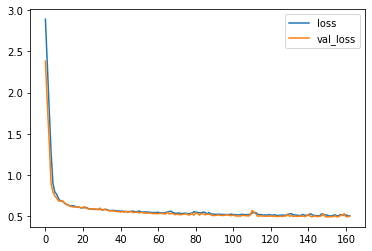

In [19]:
history.plot()